In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model as lm
import statsmodels.api as sm

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

from statsmodels.tools.eval_measures import mse, rmse

%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

import warnings
warnings.filterwarnings(action= "ignore")

In [2]:
from matplotlib import style
style.use('fivethirtyeight')

#                                                  Reggression Project (2)
 
 

## Contents
1.  Introduction
2.  The Aim of Analysis
3.  General Information of the Data
4.  Arrangements of the Data Sets
5.  Filling of the Row Data 
6.  Data Exploration 
7.  Splitting the Data
8.  Feature Engineering
     * 8.1 PCA Results with only numeric variables
     * 8.2 Switching Variables to Dummies*
       * 8.2. a) PCA Results with all features with dummies 
9.  Building Models
     * 9.1 Building Model with all Variables
     * 9.2 Adding Polinomial Features
     * 9.3 Building Polinomial Regression Models
      * 9.3 a)Checking the Best Polinomial Degree
      * 9.3 b)Checking the Performance of Models within Polinomial Degree
10. Predicting the Model
11. Evaluating the Model
12. Conclusions

**1. Introduction**

The Global Health Observatory (GHO) data repository under World Health Organization (WHO) keeps track of the health status as well as many other related factors for all countries The datasets are made available to public for the purpose of health data analysis. The dataset related to life expectancy, health factors for 193 countries has been collected from the same WHO data repository website and its corresponding economic data was collected from United Nation website. Among all categories of health-related factors only those critical factors were chosen which are more representative. It has been observed that in the past 15 years , there has been a huge development in health sector resulting in improvement of human mortality rates especially in the developing nations in comparison to the past 30 years. Therefore, in this project we have considered data from year 2000-2015 for 193 countries for further analysis. The individual data files have been merged together into a single dataset. On initial visual inspection of the data showed some missing values. As the datasets were from WHO, we found no evident errors. Missing data was handled in R software by using Missmap command. The result indicated that most of the missing data was for population, Hepatitis B and GDP. The missing data were from less known countries like Vanuatu, Tonga, Togo,Cabo Verde etc. Finding all data for these countries was difficult and hence, it was decided that we exclude these countries from the final model dataset. The final merged file(final dataset) consists of 22 Columns and 2938 rows which meant 20 predicting variables. All predicting variables was then divided into several broad categories:​Immunization related factors, Mortality factors, Economical factors and Social factors.

**2. The Aim of Analysis**

This study aims to search for the elements which effects life expectancy by using correlations with regression models.

**3. General Information of the Data**

Country : Country

Year : Year 

Status : Developed or Developing status

Life expectancy : Life Expectancy in age

Adult Mortality : Adult Mortality Rates of both sexes (probability of dying between 15 and 60 years per 1000 population)

infant deaths : Number of Infant Deaths per 1000 population


Alcohol : Alcohol, recorded per capita (15+) consumption (in litres of pure alcohol)

percentage:  expenditureExpenditure on health as a percentage of Gross Domestic Product per capita(%)

Hepatitis B : Hepatitis B (HepB) immunization coverage among 1-year-olds (%)

Measles : Measles - number of reported cases per 1000 population

BMI : Average Body Mass Index of entire population

under-five deaths : Number of under-five deaths per 1000 population

Polio : Polio (Pol3) immunization coverage among 1-year-olds (%)

Total expenditure : General government expenditure on health as a percentage of total government expenditure (%)

Diphtheria :  Diphtheria tetanus toxoid and pertussis (DTP3) immunization coverage among 1-year-olds (%)

HIV/AIDS : Deaths per 1 000 live births HIV/AIDS (0-4 years)

GDP : Gross Domestic Product per capita (in USD)

Population : Population of the country

thinness 1-19 years : Prevalence of thinness among children and adolescents for Age 10 to 19 (% )

Income composition of resources : Human Development Index in terms of income composition of resources (index ranging from 0 to 1)

Schooling : Number of years of Schooling(years)

**4. Data Exploration**

In [3]:
LifeExpectancyData = pd.read_csv('data/LifeExpectancyData.csv')
LifeExpectancyData.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.000,263.000,62,0.010,71.280,65.000,1154,...,6.000,8.160,65.000,0.100,584.259,33736494.000,17.200,17.300,0.479,10.100
1,Afghanistan,2014,Developing,59.900,271.000,64,0.010,73.524,62.000,492,...,58.000,8.180,62.000,0.100,612.697,327582.000,17.500,17.500,0.476,10.000
2,Afghanistan,2013,Developing,59.900,268.000,66,0.010,73.219,64.000,430,...,62.000,8.130,64.000,0.100,631.745,31731688.000,17.700,17.700,0.470,9.900
3,Afghanistan,2012,Developing,59.500,272.000,69,0.010,78.184,67.000,2787,...,67.000,8.520,67.000,0.100,669.959,3696958.000,17.900,18.000,0.463,9.800
4,Afghanistan,2011,Developing,59.200,275.000,71,0.010,7.097,68.000,3013,...,68.000,7.870,68.000,0.100,63.537,2978599.000,18.200,18.200,0.454,9.500


In [4]:
LifeExpectancyData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
Country                            2938 non-null object
Year                               2938 non-null int64
Status                             2938 non-null object
Life expectancy                    2928 non-null float64
Adult Mortality                    2928 non-null float64
infant deaths                      2938 non-null int64
Alcohol                            2744 non-null float64
percentage expenditure             2938 non-null float64
Hepatitis B                        2385 non-null float64
Measles                            2938 non-null int64
 BMI                               2904 non-null float64
under-five deaths                  2938 non-null int64
Polio                              2919 non-null float64
Total expenditure                  2712 non-null float64
Diphtheria                         2919 non-null float64
 HIV/AIDS                          2938 non-null

In [5]:
LifeExpectancyData.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

We have a lot of missing population values in  many countries. We alsa have GDP values from population for each countries as well. Therefore, I preferred to drop coloumn from data frame.

In [6]:
LifeExpectancyData.columns 

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [7]:
LifeExpectancyData.columns= ['Country', 'Year', 'Status', 'Life_Expectancy', 'Adult_Mortality',
       'infant_deaths', 'Alcohol', 'percentage_expenditure', 'Hepatitis_B',
       'Measles', 'BMI', 'under_five_deaths', 'Polio', 'Total_Expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP','Population', 'thinness_1_19_years', 'thinness_5_9_years',
       'Income_composition_of_resources', 'Schooling']

In [8]:
bos_hucre_toplam = LifeExpectancyData.isnull().sum()
bos_hucre_yuzde = LifeExpectancyData.isnull().sum()/LifeExpectancyData.isnull().count()
bos_degerler = pd.concat([bos_hucre_toplam, bos_hucre_yuzde], axis=1, keys=['bos_toplam', 'bos_yuzde'])
bos_degerler = bos_degerler.sort_values('bos_toplam', ascending=False)

In [9]:
def bos_hucre(LifeExpectancyData):
    bos_hucre_toplam = LifeExpectancyData.isnull().sum()
    bos_hucre_yuzde = LifeExpectancyData.isnull().sum()/LifeExpectancyData.isnull().count()
    bos_degerler = pd.concat([bos_hucre_toplam, bos_hucre_yuzde], axis=1, keys=['bos_toplam', 'bos_yuzde'])
    bos_degerler = bos_degerler.sort_values('bos_toplam', ascending=False)
    return bos_degerler[bos_degerler['bos_toplam'] > 0]

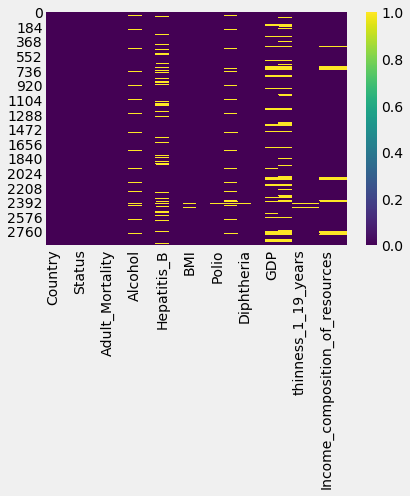

In [10]:
sns.heatmap(LifeExpectancyData.isnull(),cmap='viridis')

**4.a. Importing an Extarnel Data Frame**

***Further steps requires extra tools to compare and to group row data for cleaning and filling Null values. Therefore, I imported another data frame with neccessary columns.**

In [11]:
regions = pd.read_csv('./data/all.csv')

In [12]:
regions.head()

,name,alpha-2,alpha-3,country-code,iso_3166-2,region,sub-region,intermediate-region,region-code,sub-region-code,intermediate-region-code
0,Afghanistan,AF,AFG,4,ISO 3166-2:AF,Asia,Southern Asia,NaN,142.000,34.000,nan
1,Åland Islands,AX,ALA,248,ISO 3166-2:AX,Europe,Northern Europe,NaN,150.000,154.000,nan
2,Albania,AL,ALB,8,ISO 3166-2:AL,Europe,Southern Europe,NaN,150.000,39.000,nan
3,Algeria,DZ,DZA,12,ISO 3166-2:DZ,Africa,Northern Africa,NaN,2.000,15.000,nan
4,American Samoa,AS,ASM,16,ISO 3166-2:AS,Oceania,Polynesia,NaN,9.000,61.000,nan


In [13]:
regions[['name', 'region', 'sub-region']].isnull().sum()

name          0
region        1
sub-region    1
dtype: int64

In [14]:
regions.columns

Index(['name', 'alpha-2', 'alpha-3', 'country-code', 'iso_3166-2', 'region',
       'sub-region', 'intermediate-region', 'region-code', 'sub-region-code',
       'intermediate-region-code'],
      dtype='object')

**4.b. Merging two data frame in one, LifeExpectancyData_merged, will help us to fill in accurately.**

In [15]:
LifeExpectancyData_merged = pd.merge(LifeExpectancyData, regions[['name', 'region', 'sub-region']], left_on='Country', right_on='name')

In [16]:
bos_hucre(LifeExpectancyData_merged)

,bos_toplam,bos_yuzde
Population,556,0.197
Hepatitis_B,536,0.190
GDP,352,0.125
Total_Expenditure,204,0.072
Alcohol,187,0.066
Income_composition_of_resources,87,0.031
Schooling,83,0.029
BMI,34,0.012
thinness_5_9_years,34,0.012
thinness_1_19_years,34,0.012


In [17]:
LifeExpectancyData_merged.head()

,Country,Year,Status,Life_Expectancy,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,Hepatitis_B,Measles,...,HIV/AIDS,GDP,Population,thinness_1_19_years,thinness_5_9_years,Income_composition_of_resources,Schooling,name,region,sub-region
0,Afghanistan,2015,Developing,65.000,263.000,62,0.010,71.280,65.000,1154,...,0.100,584.259,33736494.000,17.200,17.300,0.479,10.100,Afghanistan,Asia,Southern Asia
1,Afghanistan,2014,Developing,59.900,271.000,64,0.010,73.524,62.000,492,...,0.100,612.697,327582.000,17.500,17.500,0.476,10.000,Afghanistan,Asia,Southern Asia
2,Afghanistan,2013,Developing,59.900,268.000,66,0.010,73.219,64.000,430,...,0.100,631.745,31731688.000,17.700,17.700,0.470,9.900,Afghanistan,Asia,Southern Asia
3,Afghanistan,2012,Developing,59.500,272.000,69,0.010,78.184,67.000,2787,...,0.100,669.959,3696958.000,17.900,18.000,0.463,9.800,Afghanistan,Asia,Southern Asia
4,Afghanistan,2011,Developing,59.200,275.000,71,0.010,7.097,68.000,3013,...,0.100,63.537,2978599.000,18.200,18.200,0.454,9.500,Afghanistan,Asia,Southern Asia


**5. Cleaning of the Row Data**

There is a high number of Null values on Population column. We already have GDP values on each countries so I prefered to drop it.

In [18]:
LifeExpectancyData_merged.drop('Population', inplace=True, axis=1)

In [19]:
LifeExpectancyData_merged.columns

Index(['Country', 'Year', 'Status', 'Life_Expectancy', 'Adult_Mortality',
       'infant_deaths', 'Alcohol', 'percentage_expenditure', 'Hepatitis_B',
       'Measles', 'BMI', 'under_five_deaths', 'Polio', 'Total_Expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'thinness_1_19_years',
       'thinness_5_9_years', 'Income_composition_of_resources', 'Schooling',
       'name', 'region', 'sub-region'],
      dtype='object')

In [20]:
fill_list = (bos_hucre(LifeExpectancyData_merged)).index

In [21]:
bos_hucre(LifeExpectancyData_merged)

,bos_toplam,bos_yuzde
Hepatitis_B,536,0.190
GDP,352,0.125
Total_Expenditure,204,0.072
Alcohol,187,0.066
Income_composition_of_resources,87,0.031
Schooling,83,0.029
BMI,34,0.012
thinness_5_9_years,34,0.012
thinness_1_19_years,34,0.012
Polio,19,0.007


**5. Filling of the Row Data**

In [22]:
df_interpolate = LifeExpectancyData_merged.copy()

for col in fill_list:
    df_interpolate[col] = df_interpolate.groupby(['Country'])[col].transform(lambda x: x.interpolate(limit_direction = 'both'))

In [23]:
bos_hucre(df_interpolate)

,bos_toplam,bos_yuzde
GDP,309,0.109
Hepatitis_B,144,0.051
Income_composition_of_resources,87,0.031
Schooling,83,0.029
BMI,34,0.012
thinness_5_9_years,34,0.012
thinness_1_19_years,34,0.012
Alcohol,17,0.006
Total_Expenditure,16,0.006
Life_Expectancy,10,0.004


****Applying Interpolate on both direction with grouping by Country, does not help on missing values of Total_Expenditure and Alcohol  as there is no information on related countries. Thus, I used interpolte method with grouping by sub-region and Year columns.***

In [24]:
for col in fill_list:
    df_interpolate[col] = df_interpolate.groupby(['sub-region', 'Year'])[col].transform(lambda x: x.interpolate(limit_direction='both'))

In [25]:
bos_hucre(df_interpolate)

,bos_toplam,bos_yuzde


In [26]:
LifeExpectancyData_num = df_interpolate._get_numeric_data() 

**Correlations Between All Variables**

In [27]:
corr_matrix = LifeExpectancyData_num.corr()
corr_list = corr_matrix.Life_Expectancy.abs().sort_values(ascending=False).index[1:]

Text(0.5, 1.0, 'Correlation Matrix')

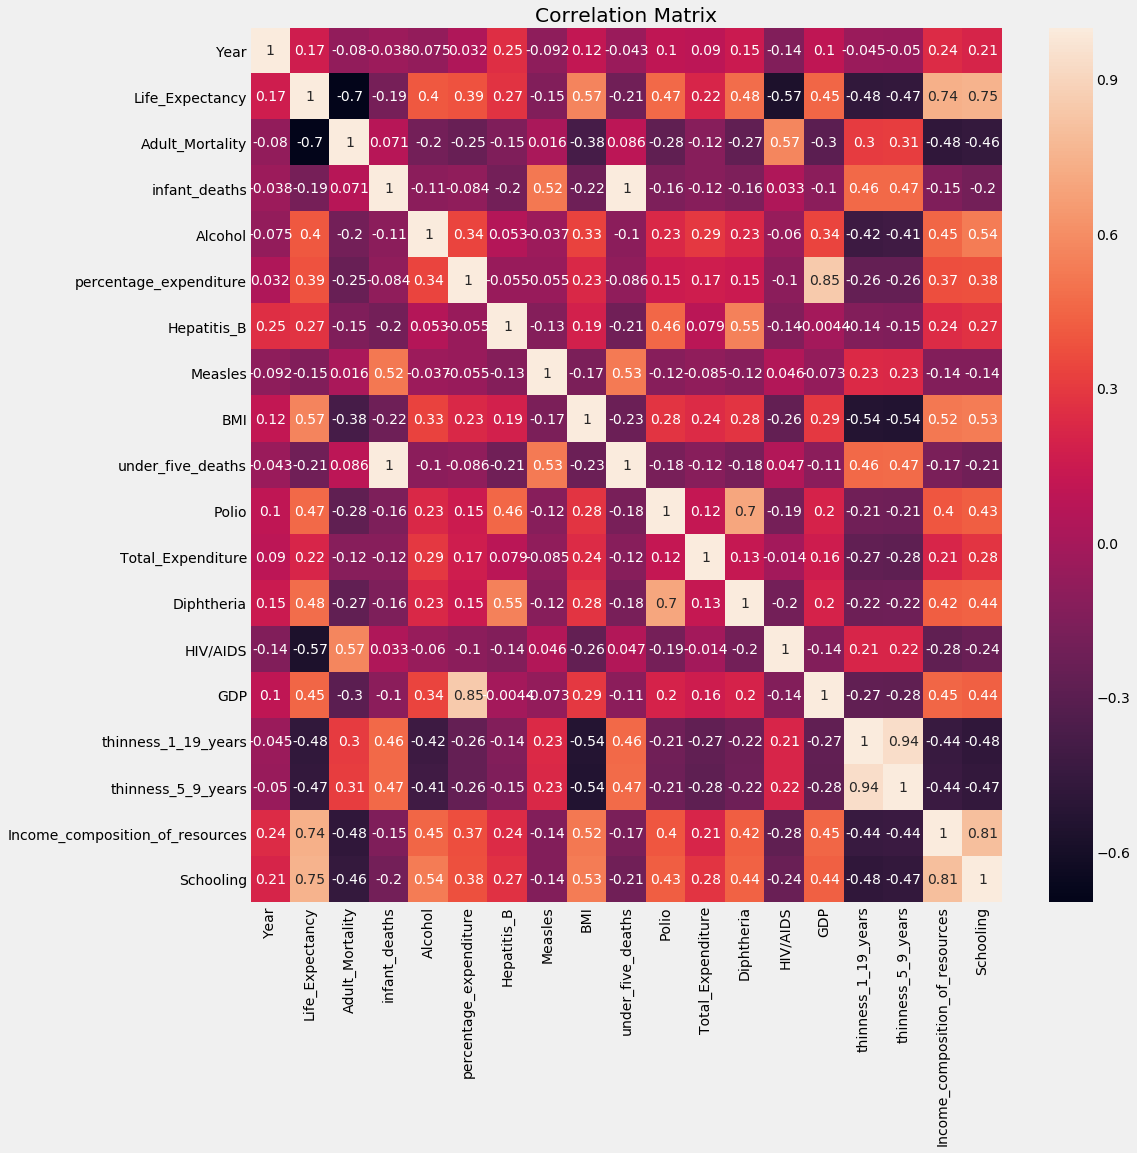

In [28]:
plt.figure(figsize=(15,15))
sns.heatmap(corr_matrix, annot=True)
plt.title('Correlation Matrix')

Chart shows that High correlations on Life Expectancy are with 'Adult_Mortality', 'HIV/AIDS', 'thinness_5_9_years', 'thinness_1_19_years','Income_composition_of_resources', 'Schooling' variables.

fazla degisken eklemek ek hesaplamalar getireceginden toplam varyansi en az degiskenle aciklamak esastir

# Corellation between ilnesses

In [29]:
LifeExpectancyData_num.columns

Index(['Year', 'Life_Expectancy', 'Adult_Mortality', 'infant_deaths',
       'Alcohol', 'percentage_expenditure', 'Hepatitis_B', 'Measles', 'BMI',
       'under_five_deaths', 'Polio', 'Total_Expenditure', 'Diphtheria',
       'HIV/AIDS', 'GDP', 'thinness_1_19_years', 'thinness_5_9_years',
       'Income_composition_of_resources', 'Schooling'],
      dtype='object')

In [30]:
corr_matrix = LifeExpectancyData_num[['Hepatitis_B','Measles', 'Polio','Diphtheria','HIV/AIDS', 'thinness_1_19_years', 'thinness_5_9_years','Life_Expectancy']].corr()
corr_list = corr_matrix.Life_Expectancy.abs().sort_values(ascending=False).index[1:]

Text(0.5, 1.0, 'Correlation Matrix')

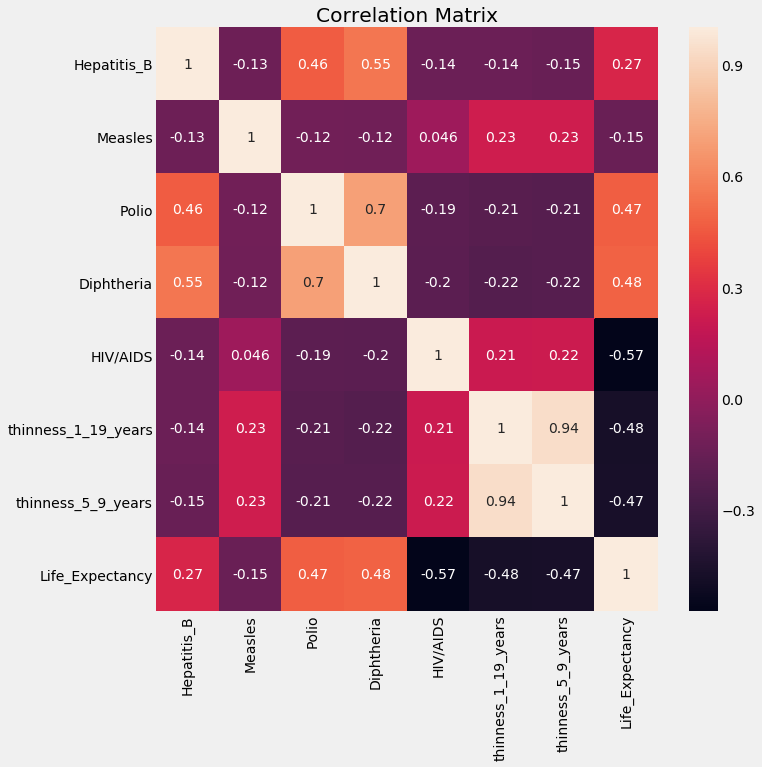

In [47]:
plt.figure(figsize=(10,10))
sns.heatmap(corr_matrix, annot=True)
plt.title('Correlation Matrix')

Life Expectancy Distribution in Years 

# Life_Expectancy Values  in Years by Regions 

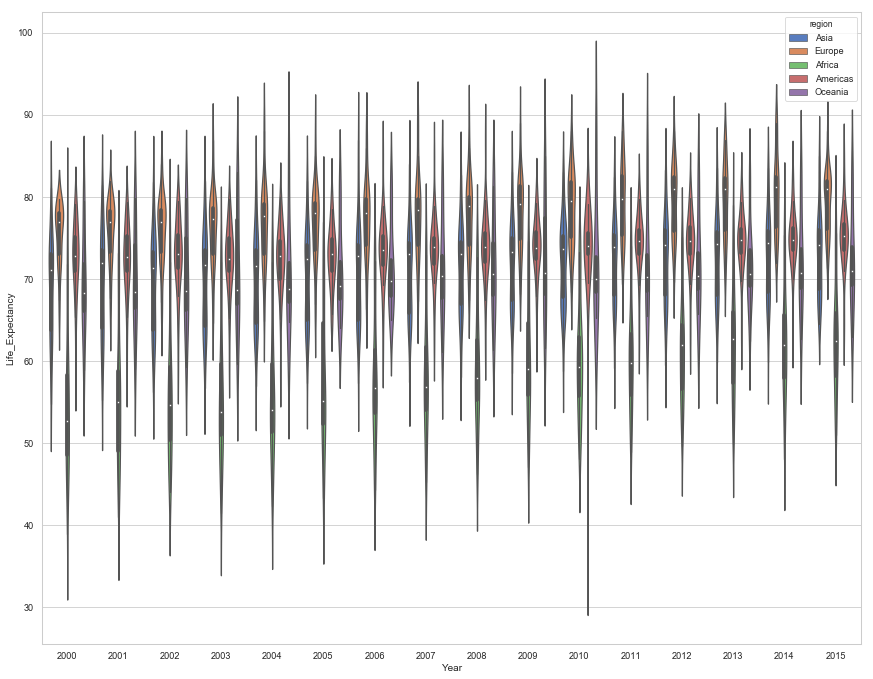

In [138]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 15.7,13
ax = sns.violinplot(x=df_interpolate["Year"], y=df_interpolate["Life_Expectancy"],hue=df_interpolate["region"], data=df_interpolate, palette="muted")

# General Looking on Life Expectancy in Years

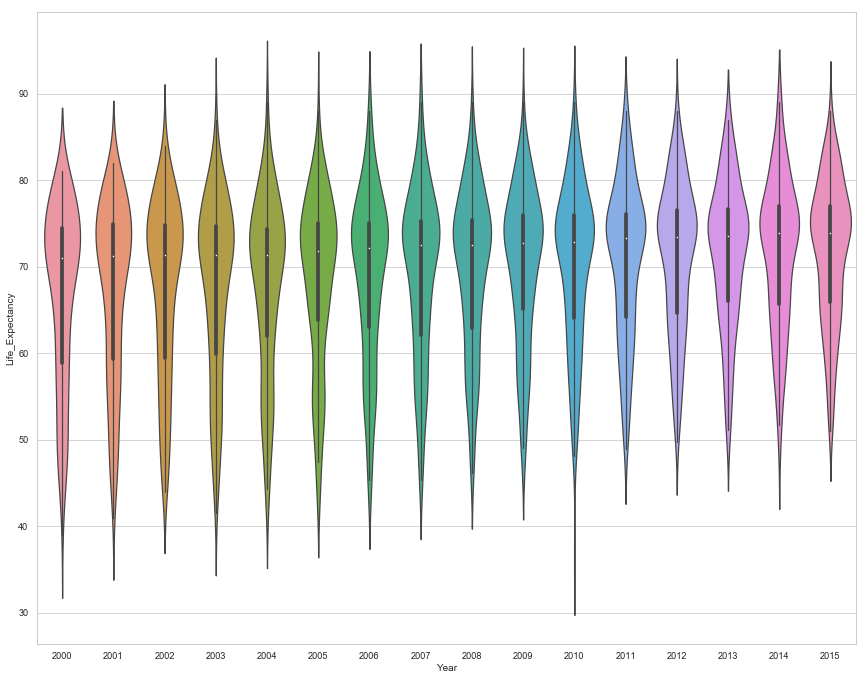

In [137]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 15.7,13
ax = sns.violinplot(x=df_interpolate["Year"], y=df_interpolate["Life_Expectancy"], data=df_interpolate)

# Getting Categorical Variables from Data Frame

In [35]:
df_interpolate.select_dtypes(include=['object']).dtypes

Country       object
Status        object
name          object
region        object
sub-region    object
dtype: object

In [36]:
df_interpolate.columns

Index(['Country', 'Year', 'Status', 'Life_Expectancy', 'Adult_Mortality',
       'infant_deaths', 'Alcohol', 'percentage_expenditure', 'Hepatitis_B',
       'Measles', 'BMI', 'under_five_deaths', 'Polio', 'Total_Expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'thinness_1_19_years',
       'thinness_5_9_years', 'Income_composition_of_resources', 'Schooling',
       'name', 'region', 'sub-region'],
      dtype='object')

In [37]:
len(df_interpolate['Country'])

2826

In [38]:
len(df_interpolate['Status'])

2826

In [39]:
len(df_interpolate['region'])

2826

In [40]:
len(df_interpolate['percentage_expenditure'])


2826

In [41]:
df_interpolate.region.unique()

array(['Asia', 'Europe', 'Africa', 'Americas', 'Oceania'], dtype=object)

In [42]:
mean_by_year_and_region = df_interpolate.groupby(by=["region", "percentage_expenditure"]).mean()["Life_Expectancy"]

In [43]:
mean_by_year_and_region=mean_by_year_and_region.reset_index()

Text(0, 0.5, 'Life_Expectancy')

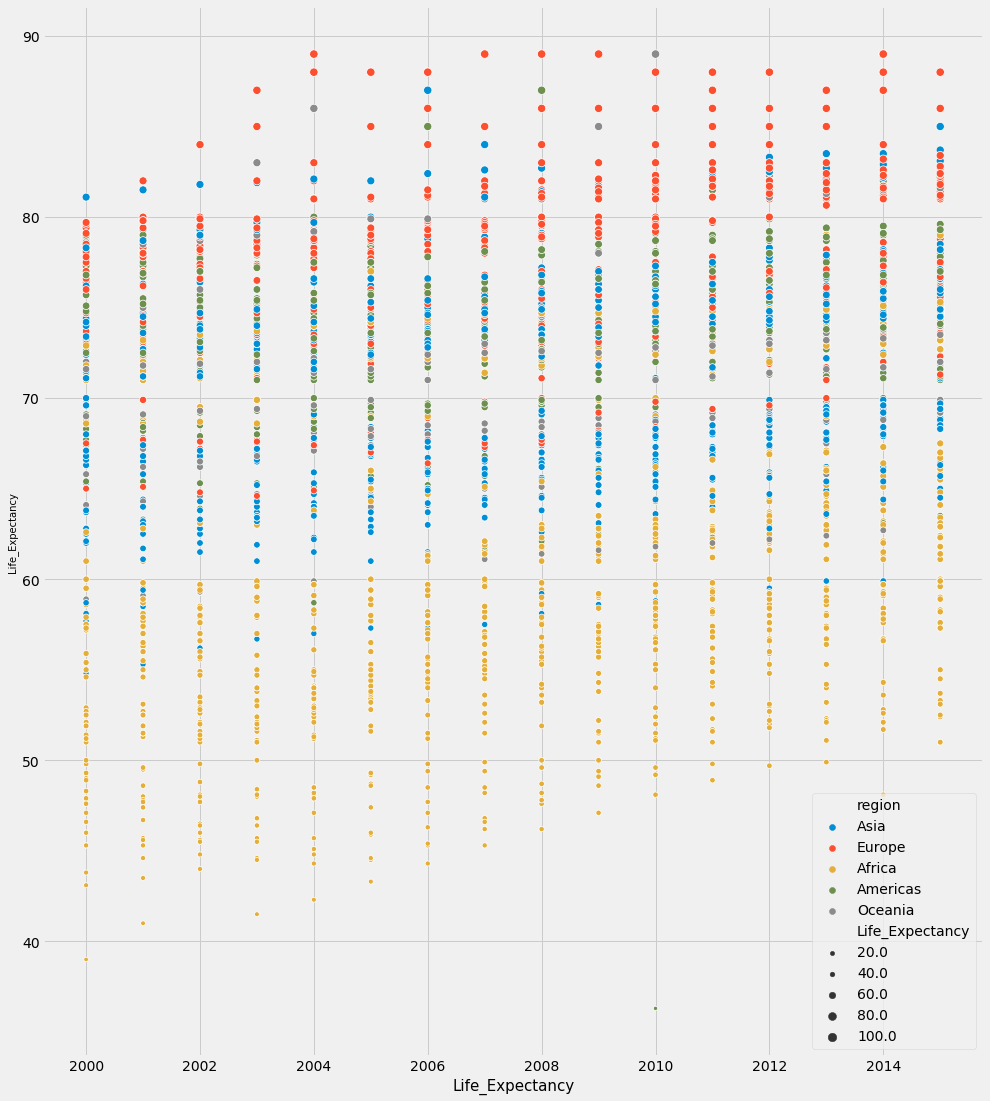

In [44]:
plt.figure(figsize=(15,18))
sns.scatterplot(x='Year', y='Life_Expectancy', hue='region',data=df_interpolate, s = df_interpolate.Adult_Mortality*100, size='Life_Expectancy', size_order =0.0005);
plt.xlabel('Life_Expectancy',size=15)
plt.ylabel('Life_Expectancy', size =10)

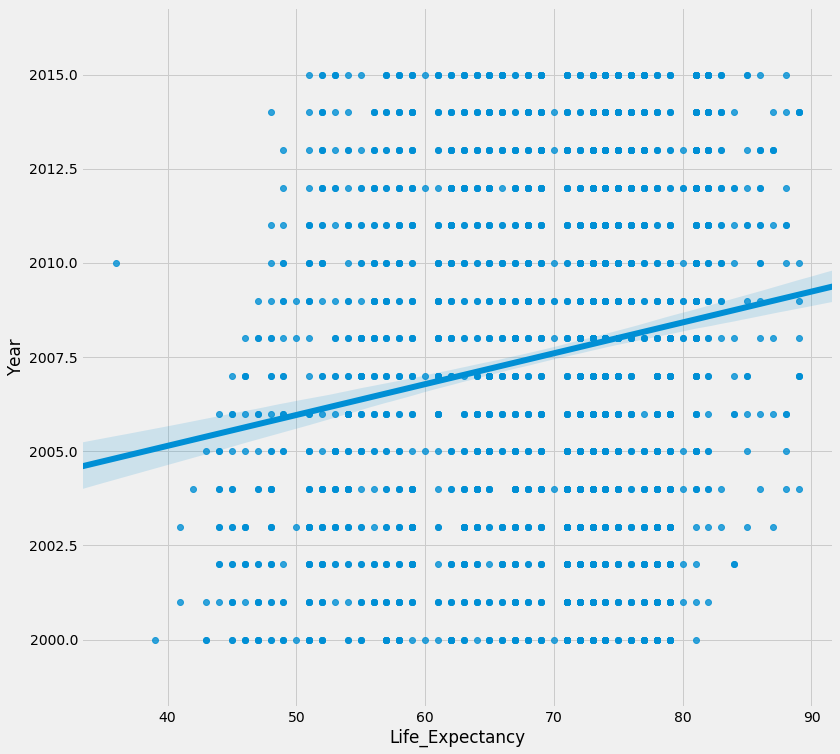

In [45]:
plt.figure(figsize=(12,12))
data_X = df_interpolate['Life_Expectancy']
data_Y = df_interpolate['Year']
data_Y = data_Y.round(1)
data_Y = data_Y.astype(int)
data_X = data_X.astype(int)
sns.regplot(data_X, data_Y, data=df_interpolate)
plt.show()

# General Look at Outliers

In [93]:
plt.rcParams['figure.dpi'] = 60
plt.rcParams['figure.figsize'] = (8,5.5)

IndexError: list index out of range

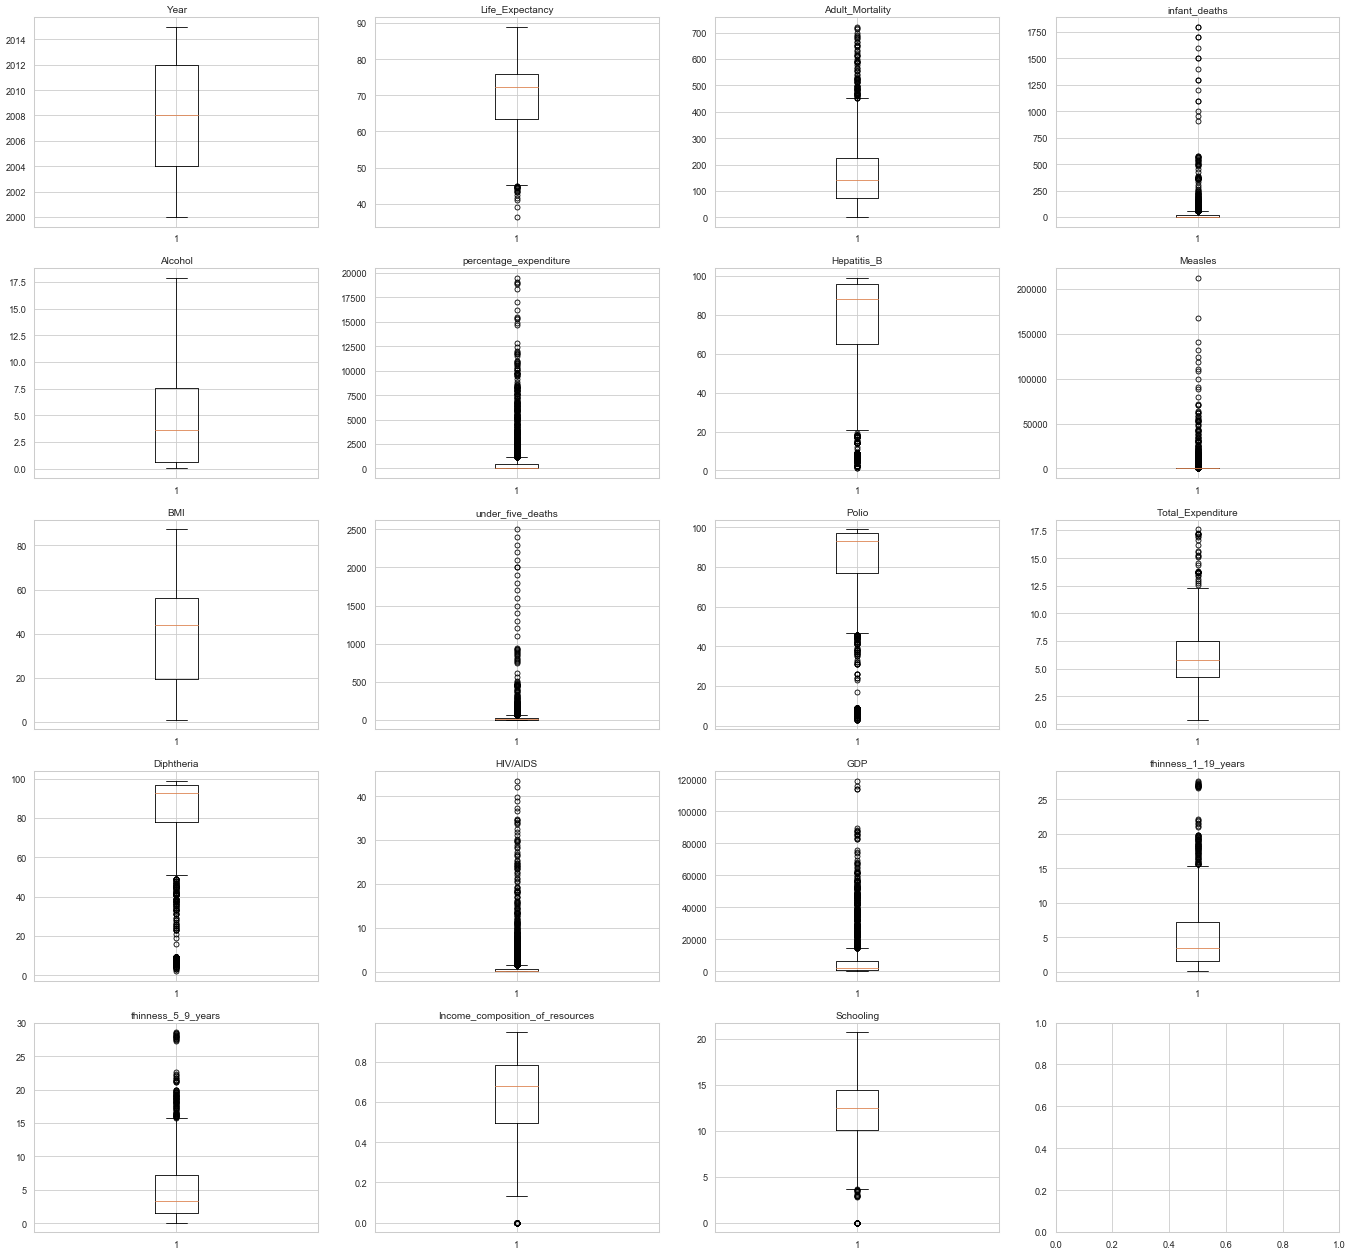

In [115]:
outliers_by_nineteen_variables = ['Year', 'Life_Expectancy','Adult_Mortality', 'infant_deaths', 'Alcohol', 'percentage_expenditure',
                                    'Hepatitis_B','Measles', 'BMI',
                                    'under_five_deaths', 'Polio', 'Total_Expenditure','Diphtheria', 'HIV/AIDS', 'GDP',
                                    'thinness_1_19_years', 'thinness_5_9_years', 'Income_composition_of_resources', 'Schooling'] 
plt.figure(figsize=(25,25))

for i in range(0,24):
    plt.subplot(5, 4, i+1)
    plt.boxplot(df_interpolate[outliers_by_nineteen_variables[i]])
    plt.title(outliers_by_nineteen_variables[i])

# Life Expectancy Between Other Categoric Variables

In [155]:
df_interpolate.columns

Index(['Country', 'Year', 'Status', 'Life_Expectancy', 'Adult_Mortality',
       'infant_deaths', 'Alcohol', 'percentage_expenditure', 'Hepatitis_B',
       'Measles', 'BMI', 'under_five_deaths', 'Polio', 'Total_Expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'thinness_1_19_years',
       'thinness_5_9_years', 'Income_composition_of_resources', 'Schooling',
       'name', 'region', 'sub-region', 'winsorize_Life_Expectancy'],
      dtype='object')

ValueError: usermedians length not compatible with x

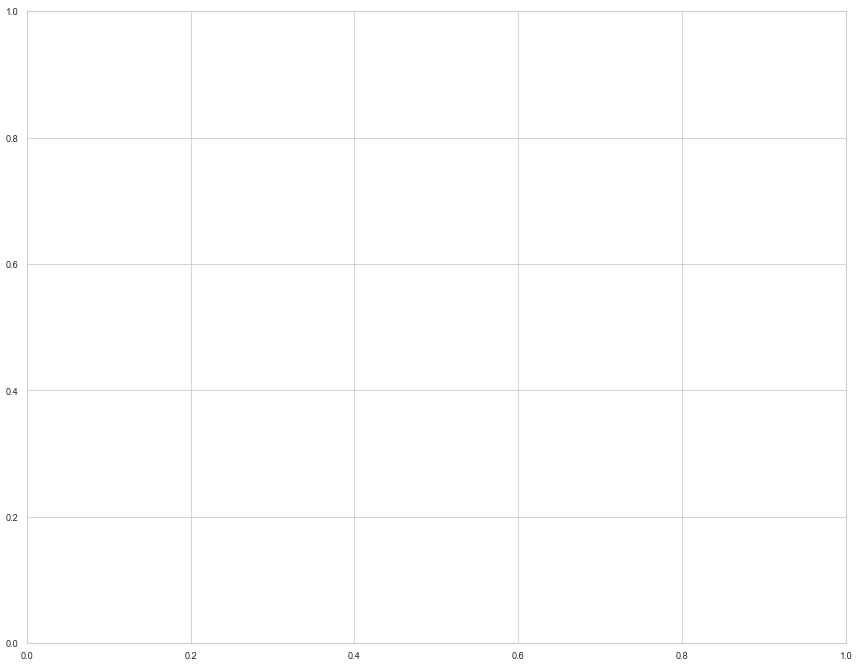

In [158]:
def Life_ExpectancyCategoric(n):
    if n == 1:
        med = 0.1
        CI = (-0.25, 0.25)
    else:
        med = 0.2
        CI = (-0.35, 0.50)

    return med, CI

inc = 0.1
cat1 = df_interpolate['Year']
cat2 = df_interpolate['Adult_Mortality']
cat3 = df_interpolate['Alcohol']
cat4 = df_interpolate['Polio']
cat5 = df_interpolate['Schooling']
cat6 = df_interpolate['Life_Expectancy']

variables = [cat1, cat2, cat3, cat4, cat5, cat6]
med1, CI1 = Life_ExpectancyCategoric(1)
med2, CI2 = Life_ExpectancyCategoric(2)
medians = [None, None, med1, med2]
conf_intervals = [None, None, CI1, CI2]

fig, ax = plt.subplots()
pos = np.array(range(len(variables))) + 1
bp = ax.boxplot(variables, sym='k+', positions=pos,
                notch=1, bootstrap=5000,
                usermedians=medians,
                conf_intervals=conf_intervals)

ax.set_xlabel('variables')
ax.set_ylabel('Life_Expectancy')
plt.setp(bp['whiskers'], color='k', linestyle='-')
plt.setp(bp['fliers'], markersize=3.0)
plt.show()


In [139]:
from scipy.stats.mstats import winsorize

In [ ]:
df_interpolate["winsorize_Life_Expectancy"]        = winsorize(Happiness_report2["Life_Expectancy"], (0, 0.05))
df_interpolate["winsorize_Adult_Mortality"]        = winsorize(Happiness_report2["Adult_Mortality"], (0, 0.02))
df_interpolate["winsorize_percentage_expenditure"] = winsorize(Happiness_report2["percentage_expenditure"], (0, 0.05))
df_interpolate["winsorize_Hepatitis_B"]            = winsorize(Happiness_report2["Hepatitis_B"], (0, 0.03))
df_interpolate["winsorize_Measles"]                = winsorize(Happiness_report2["Measles"], (0, 0.03))
df_interpolate["winsorize_under_five_deaths"]      = winsorize(Happiness_report2["under_five_deaths"], (0, 0.03))
df_interpolate["winsorize_Polio"]                  = winsorize(Happiness_report2["Polio"], (0, 0.03))
df_interpolate["winsorize_Total_Expenditure"]      = winsorize(Happiness_report2["Total_Expenditure"], (0, 0.03))
df_interpolate["winsorize_Diphtheria"]             = winsorize(Happiness_report2["Diphtheria"], (0, 0.03))
df_interpolate["winsorize_HIV/AIDS"]               = winsorize(Happiness_report2["HIV/AIDS"], (0, 0.03))
df_interpolate["winsorize_GDP"]                    = winsorize(Happiness_report2["GDP"], (0, 0.03))
df_interpolate["winsorize_thinness_1_19_years"]    = winsorize(Happiness_report2["thinness_1_19_years"], (0, 0.03))
df_interpolate["winsorize_thinness_5_9_years"]     = winsorize(Happiness_report2["thinness_5_9_years"], (0, 0.03))
df_interpolate["winsorize_Income_composition_of_resources"] = winsorize(df_interpolate["Income_composition_of_resources"], (0, 0.02))
df_interpolate["winsorize_Schooling"]              = winsorize(Happiness_report2["Schooling"], (0, 0.04))


In [153]:
df_interpolate["winsorize_Life_Expectancy"] = winsorize(df_interpolate["Life_Expectancy"], (0, 0))

{'whiskers': [<matplotlib.lines.Line2D at 0x211265d58d0>,
 'caps': [<matplotlib.lines.Line2D at 0x211265d5fd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x211265d54e0>],
 'medians': [<matplotlib.lines.Line2D at 0x211265df710>],
 'fliers': [<matplotlib.lines.Line2D at 0x211265dfa90>],
 'means': []}

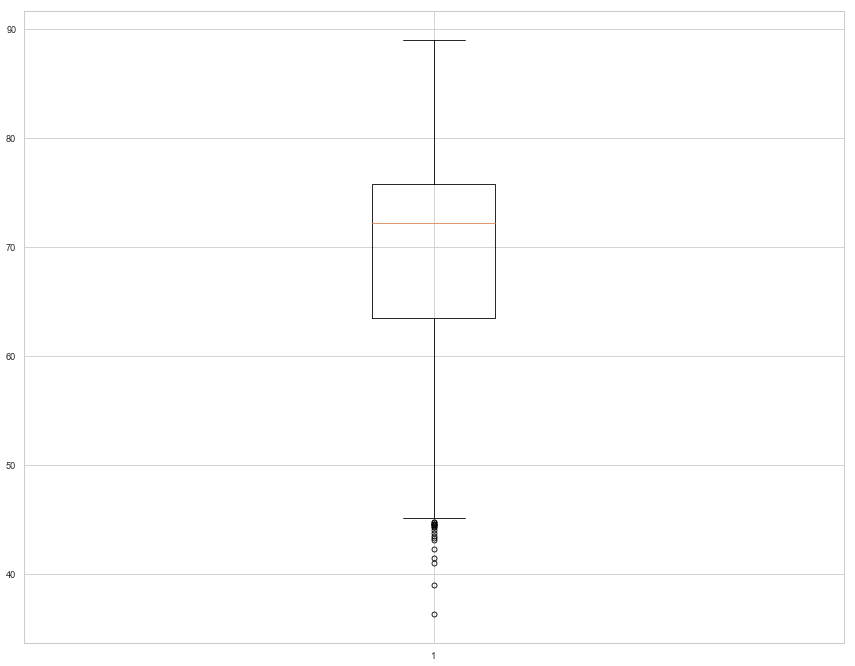

In [154]:
plt.boxplot(df_interpolate["Life_Expectancy"])

# 8.Feature Engineering

**8.1 PCA Results with only numeric variables**

In [48]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sqlalchemy import create_engine
import warnings

***Numerik verilerle PCA DEGERLERI***

In [49]:
#Kovaryans Matriksi 

LifeExpectancyData_num = LifeExpectancyData_num.dropna()

X = StandardScaler().fit_transform(LifeExpectancyData_num)#standardize the feature matrix

pca = PCA(n_components=0.95, whiten=True)

X_pca = pca.fit_transform(X)

In [50]:
print (pca.explained_variance_ratio_)

[0.33404722 0.12688528 0.09964889 0.07131077 0.0649958  0.0542343
 0.04168898 0.03913402 0.03116406 0.02817749 0.0253805  0.02213014
 0.01802371]


In [51]:
#Show results

print('Original Number of Features', X.shape[1]) #shape[1]deki amac sadece boyutuna bakmak ve gozlem sayisini es gecmek
print('Reduced Number of Features',X_pca.shape[1] )

Original Number of Features 19
Reduced Number of Features 13


In [52]:
#Creating a scaler object
sc = StandardScaler()

#fit the scaler to the features and transform
X_std = sc.fit_transform(X)

# Fit the PCA and transform the data
X_std_pca = pca.fit_transform(X_std)

# View the new feature data's shape
X_std_pca.shape

(2826, 13)

In [53]:
from sklearn.decomposition import PCA
from sklearn import decomposition, datasets

In [54]:
#Creating a PCA object with 13 components as a parameter
pca = decomposition.PCA(n_components=13) 
# Fit the PCA and transform the data
X_std_pca = pca.fit_transform(X_std)

# View the new feature data's shape
X_std_pca.shape

(2826, 13)

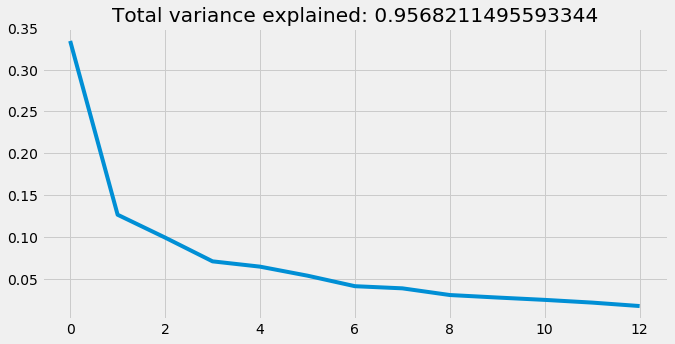

In [55]:
plt.figure(figsize = (10,5))
plt.plot(pca.explained_variance_ratio_)
plt.title('Total variance explained: {}'.format(pca.explained_variance_ratio_.sum()))
plt.show()

#Gerek yok

Xt = X.T
Cx = np.cov(Xt)

#print('Kovaryans matrisi :\n', Cx)
eig_val_cov, eig_vec_cov = np.linalg.eig(Cx)


GEREK YOK


plt.plot(eig_val_cov)
plt.show()
plt.title("Total Variance Explanied: {}.format(PCA)")
print(eig_val_cov)

**8.2 Switching Variables to Dummies**

In [56]:
df_interpolate.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2826 entries, 0 to 2825
Data columns (total 24 columns):
Country                            2826 non-null object
Year                               2826 non-null int64
Status                             2826 non-null object
Life_Expectancy                    2826 non-null float64
Adult_Mortality                    2826 non-null float64
infant_deaths                      2826 non-null int64
Alcohol                            2826 non-null float64
percentage_expenditure             2826 non-null float64
Hepatitis_B                        2826 non-null float64
Measles                            2826 non-null int64
BMI                                2826 non-null float64
under_five_deaths                  2826 non-null int64
Polio                              2826 non-null float64
Total_Expenditure                  2826 non-null float64
Diphtheria                         2826 non-null float64
HIV/AIDS                           2826 non-null

In [57]:
df_dummies = pd.get_dummies(df_interpolate)
df_dummies.head()

,Year,Life_Expectancy,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,Hepatitis_B,Measles,BMI,under_five_deaths,...,sub-region_Northern Africa,sub-region_Northern America,sub-region_Northern Europe,sub-region_Polynesia,sub-region_South-eastern Asia,sub-region_Southern Asia,sub-region_Southern Europe,sub-region_Sub-Saharan Africa,sub-region_Western Asia,sub-region_Western Europe
0,2015,65.000,263.000,62,0.010,71.280,65.000,1154,19.100,83,...,0,0,0,0,0,1,0,0,0,0
1,2014,59.900,271.000,64,0.010,73.524,62.000,492,18.600,86,...,0,0,0,0,0,1,0,0,0,0
2,2013,59.900,268.000,66,0.010,73.219,64.000,430,18.100,89,...,0,0,0,0,0,1,0,0,0,0
3,2012,59.500,272.000,69,0.010,78.184,67.000,2787,17.600,93,...,0,0,0,0,0,1,0,0,0,0
4,2011,59.200,275.000,71,0.010,7.097,68.000,3013,17.200,97,...,0,0,0,0,0,1,0,0,0,0


**8.2. a) PCA Results with all features with dummies**

In [58]:
df_dummies = df_dummies.dropna()

X = StandardScaler().fit_transform(df_dummies)#standardize the feature matrix

pca = PCA(n_components=0.95, whiten=True)

X_pca = pca.fit_transform(X)

In [59]:
print('Original Number of Features', X.shape[1]) 
print('Reduced Number of Features',X_pca.shape[1])

Original Number of Features 415
Reduced Number of Features 178


In [60]:
#Creating a scaler object
sc = StandardScaler()

#fit the scaler to the features and transform
X_std = sc.fit_transform(X)

In [61]:
#Creating a PCA object with 178 components as a parameter
pca = decomposition.PCA(n_components=178) 
# Fit the PCA and transform the data
X_std_pca = pca.fit_transform(X_std)

# View the new feature data's shape
X_std_pca.shape

(2826, 178)

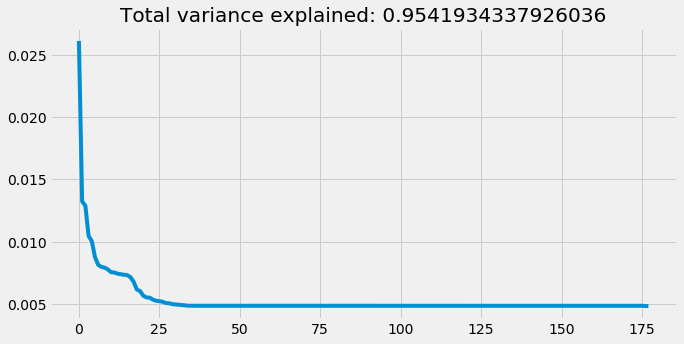

In [62]:
plt.figure(figsize = (10,5))
plt.plot(pca.explained_variance_ratio_)
plt.title('Total variance explained: {}'.format(pca.explained_variance_ratio_.sum()))
plt.show()

PCA with 178 variables can explain of 95% of total variance.

Xt = X.T
Cx = np.cov(Xt)

#print('Kovaryans matrisi :\n', Cx)
eig_val_cov, eig_vec_cov = np.linalg.eig(Cx)

# 9. Building Models

 **9.1 Building Model with all Variables**

In [63]:
y_allValues = LifeExpectancyData_num['Life_Expectancy']
X_allValues = LifeExpectancyData_num[corr_list]

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X_allValues, y_allValues, test_size = 0.2, random_state = 101)

print("Eğitim kümesindeki gözlem sayısı : {}".format(X_train.shape[0]))
print("Test kümesindeki gözlem sayısı   : {}".format(X_test.shape[0]))

Eğitim kümesindeki gözlem sayısı : 2260
Test kümesindeki gözlem sayısı   : 566


We're splitting the data in two, so out of 100 rows, 80 rows will go into the training set, and 20 rows will go into the testing set.

In [78]:
X_train = sm.add_constant(X_train)

tum_degiskenli_model = sm.OLS(y_train, X_train).fit()

tum_degiskenli_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_Expectancy   R-squared:                       0.570
Model:                            OLS   Adj. R-squared:                  0.569
Method:                 Least Squares   F-statistic:                     427.0
Date:                Wed, 15 May 2019   Prob (F-statistic):               0.00
Time:                        10:38:08   Log-Likelihood:                -7318.0
No. Observations:                2260   AIC:                         1.465e+04
Df Residuals:                    2252   BIC:                         1.470e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  61.6417      0.584    105.549      0.000      60.496      62.787
HIV/AIDS               -0.9015      0.030    -30.325      0.000      -0.960      -0.843
Diphtheria              0.0872      0.008     10.830      0.000       0.071       0.103
thinness_1_19_years    -0.3678      0.081     -4.524      0.000      -0.527      -0.208
thinness_5_9_years     -0.2422      0.079     -3.057      0.002      -0.397      -0.087
Polio                   0.0710      0.008      9.407      0.000       0.056       0.086
Hepatitis_B            -0.0107      0.005     -1.953      0.051      -0.021    4.39e-05
Measles             -1.566e-05   1.35e-05     -1.163      0.245   -4.21e-05    1.07e-05
==============================================================================
Omnibus:                       39.889   Durbin-Watson:                   2.033
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               54.319
Skew:                          -0.213   Prob(JB):                     1.60e-12
Kurtosis:                       3.628   Cond. No.                     4.62e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.62e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [79]:
pDegeri = tum_degiskenli_model.pvalues
anlamli_degerler = list(pDegeri[pDegeri<= 0.05].index)

# Hatalarin Dagilimi

tahmin edilen katsayılarımızın istatistiksel anlamlılığını ölçmek için, hata terimleri normal olarak dağıtılmalıdır.

In [66]:
from sklearn import linear_model

In [67]:
tum_degiskenli_model = linear_model.LinearRegression()
tum_degiskenli_model.fit(X_allValues, y_allValues)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [68]:
pred = tum_degiskenli_model.predict(X_allValues)
hatalar = y_allValues - pred

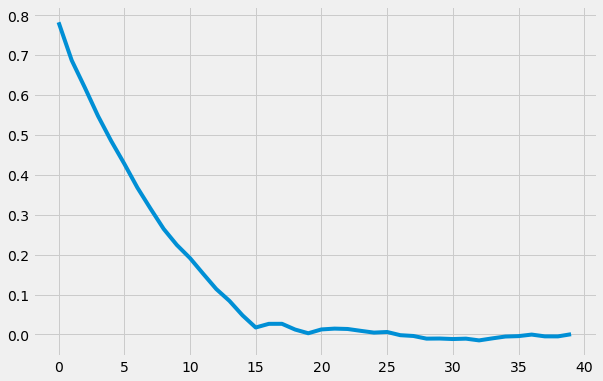

In [69]:
from statsmodels.tsa.stattools import acf

acf_data = acf(hatalar)

plt.figure(figsize=(9,6))
plt.plot(acf_data[1:])
plt.show()

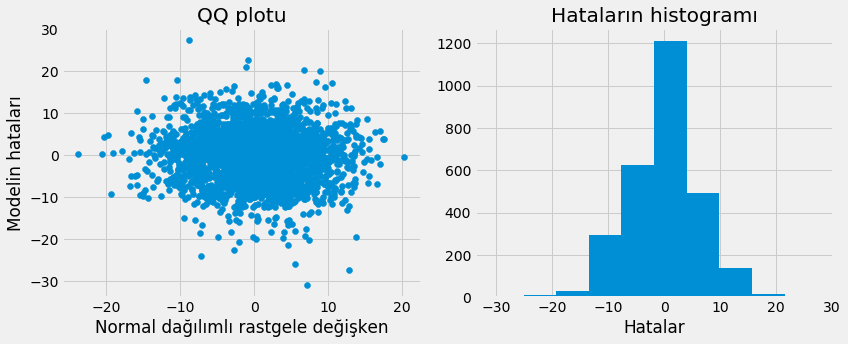

In [70]:
rand_nums = np.random.normal(np.mean(hatalar), np.std(hatalar), len(hatalar))

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.scatter(rand_nums, hatalar)
plt.xlabel("Normal dağılımlı rastgele değişken")
plt.ylabel("Modelin hataları")
plt.title("QQ plotu")

plt.subplot(1,2,2)
plt.hist(hatalar)
plt.xlabel("Hatalar")
plt.title("Hataların histogramı")

plt.tight_layout()
plt.show()

# Jaua Bera

In [71]:
from scipy.stats import jarque_bera
from scipy.stats import normaltest

H0:Hatalar normal dagilmistir
H1: Hatalar normal dagilmamistir

In [73]:
jb_stats = jarque_bera(hatalar)
norm_stats = normaltest(hatalar)

print("Jarque-Bera test değeri : {0} ve p değeri : {1}".format(jb_stats[0], jb_stats[1]))
print("Normal test değeri      : {0}  ve p değeri : {1:.30f}".format(norm_stats[0], norm_stats[1]))

Jarque-Bera test değeri : 86.78091983847585 ve p değeri : 0.0
Normal test değeri      : 56.33411806395291  ve p değeri : 0.000000000000585061729942572503


normal dagilmamistir

**9.2 Adding Polinomial Features**

In [80]:
df = LifeExpectancyData_num.drop(["Life_Expectancy", "Year"], axis=1)

In [81]:
df.shape

(2826, 17)

**9.3 Building Polinomial Regression Models**

**9.3 a)Checking the Performance of Models within Polinomial Degree**

In [82]:
from sklearn.preprocessing import PolynomialFeatures #once tanimlayip fit edip degiskene uygulayacagiz

In [83]:
# 3 dereceli polinomlu for dongusu 

def model_olustur(df,pol):
    poly = PolynomialFeatures(pol)
    poly_array = poly.fit_transform(df.drop('Life_Expectancy', axis=1))
    df_pol = pd.DataFrame(poly_array, columns= poly.get_feature_names())
    y = df['Life_Expectancy']
    X = df_pol

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 101)

    X_train = sm.add_constant(X_train)

    ModelPol = sm.OLS(y_train, X_train).fit()
    pDegeri = ModelPol.pvalues
    anlamli_degerler = list(pDegeri[pDegeri<= 0.05].index)
    

    MSE_list=[]
    R_list=[]
    degisken_sayisi=[]
    MAE_list=[]
    RMSE_list=[]
    MAPE_list=[]
    R_train_list=[]
    MSE_train_list=[]



    for degisken in range(len(anlamli_degerler)):
        Feature_list= anlamli_degerler[0:len(anlamli_degerler)-degisken]
        
        X_poly=df_pol[Feature_list]
        X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size = 0.2, random_state = 0)
        
        model_poly_lineer = LinearRegression()
        results = model_poly_lineer.fit(X_train, y_train)
        y_pred  = model_poly_lineer.predict(X_test)
        y_pred_train = model_poly_lineer.predict(X_train)

        MSE_list.append(mse(y_test, y_pred))
        MSE_train_list.append(mse(y_train, y_pred_train))

        R_list.append(model_poly_lineer.score(X_test, y_test))

        R_train_list.append(model_poly_lineer.score(X_train, y_train))


        degisken_sayisi.append(len(Feature_list))

        MAE_list.append(mean_absolute_error(y_test, y_pred))

        RMSE_list.append(rmse(y_test, y_pred))

        MAPE_list.append(np.mean(np.abs((y_test-y_pred) / y_test)) * 100)
        
    model_ortalamaları = list(zip(degisken_sayisi, R_list,R_train_list,MSE_list,MSE_train_list,MAE_list,RMSE_list,MAPE_list))
    poly_Ortalamalar = pd.DataFrame(model_ortalamaları, columns= ['degisken_sayisi','R_list','R_train_list',
                                                            'MSE_list','MSE_train_list','MAE_list', 'RMSE_list', 'MAPE_list'])#for un disina aldim
    
    return poly_Ortalamalar

In [84]:
df_pol2 = model_olustur(LifeExpectancyData_num,2)
df_pol3 = model_olustur(LifeExpectancyData_num,3)

**Visualization 2 models**

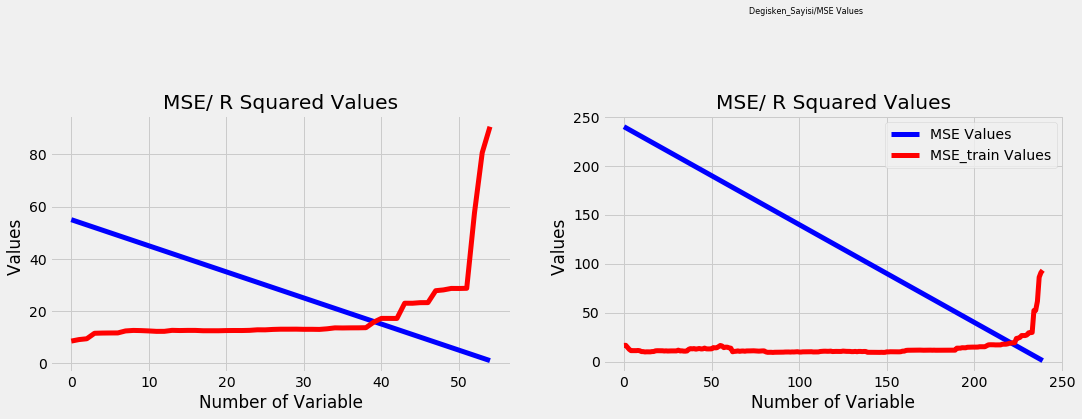

In [87]:
plt.figure(1, figsize = (25,15))
plt.suptitle('Degisken_Sayisi/MSE Values', size=8)



plt.subplot(3,3,1)
plt.plot(df_pol2.degisken_sayisi,label = 'MSE Values', color='blue', linewidth=5)
plt.plot(df_pol2.MSE_list,label = '/MSE_train Values', color='red', linewidth=5)
plt.xlabel('Number of Variable')
plt.ylabel('Values ')
plt.title('MSE/ R Squared Values')


plt.subplot(3,3,2)
plt.plot(df_pol3.degisken_sayisi,label = 'MSE Values', color='blue', linewidth=5)
plt.plot(df_pol3.MSE_list,label = 'MSE_train Values', color='red', linewidth=5)
plt.xlabel('Number of Variable')
plt.ylabel('Values ')
plt.title('MSE/ R Squared Values')


plt.subplots_adjust()
plt.legend()
plt.show()



# PLT ile Bar plot

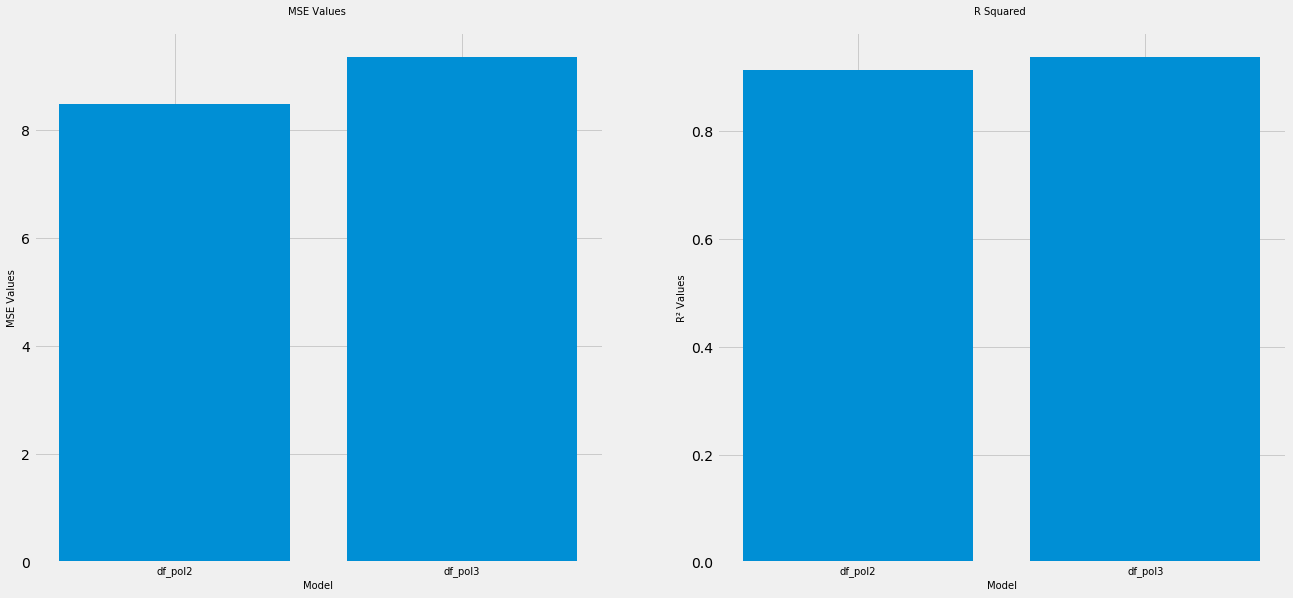

In [88]:
plt.figure(figsize=(20,20))
objects = ('df_pol2', 'df_pol3')

y_pos = np.arange(len(objects)) 
performance  =[df_pol2.MSE_list.min(), df_pol3.MSE_list.min()]
performance2 =[df_pol2.R_train_list.max(), df_pol3.R_train_list.max()]

plt.subplot(221)
plt.bar(y_pos, performance, align='center')
plt.xticks(y_pos, objects,size=10)
plt.xlabel('Model',size=10)
plt.ylabel('MSE Values',size=10)
plt.title('MSE Values \n', fontsize=10)
plt.subplot(222)
plt.bar(y_pos, performance2, align='center')
plt.xticks(y_pos, objects,size=10)
plt.title('R Squared \n', size = 10)

plt.xlabel('Model',size=10)
plt.ylabel('R² Values',size=10)

plt.show()



# PLT PLOT ile train test MSE DEGISKEN SAYISINA GORE Her poli degeri icin 

In [ ]:
plt.figure(figsize=(25,25))
objects = ('df_pol2', 'df_pol3')

y_pos = np.arange(len(objects)) 
performance  =[df_pol2.MSE_train_list.min(), df_pol3.MSE_train_list.min()]
performance2 =[df_pol2.MSE_list.min(), df_pol3.MSE_list.min()]

plt.subplot(221)
plt.bar(y_pos, performance, align='center')
plt.xticks(y_pos, objects,size=10)
plt.xlabel('Model',size=10)
plt.ylabel('MSE_Train Values',size=10)
plt.title('MSE_Train Min Values \n', fontsize=10)
plt.subplot(222)
plt.bar(y_pos, performance2, align='center')
plt.xticks(y_pos, objects,size=10)
plt.title('MSE_list Min \n', size = 10)

plt.xlabel('Model',size=10)
plt.ylabel('MSE_list',size=10)

plt.ylim(5.30,5.40)

plt.show()

In [ ]:
#BUNU 2 GARIFKLE YANYANA YAPTIR HER POLI DEGERI ICIN
plt.figure(1, figsize = (25,25))

plt.subplot(331)
plt.plot(df_pol2.degisken_sayisi,df_pol2.MSE_list,label = 'MSE Values', color='blue', linewidth=5)
plt.plot(df_pol2.degisken_sayisi,df_pol2.MSE_train_list,label = 'MSE_train Values', color='red', linewidth=5)
plt.xlabel('Number of Variable')
plt.ylabel('MSE Train/Test Values ')
plt.title('Polinom 2 derece Values')


plt.subplot(332)
plt.plot(df_pol3.degisken_sayisi,df_pol3.MSE_list,label = 'MSE Values', color='blue', linewidth=5)
plt.plot(df_pol3.degisken_sayisi,df_pol3.MSE_train_list,label = 'MSE_train Values', color='red', linewidth=5)
plt.xlabel('Number of Variable')
plt.ylabel('MSE Train/Test Values ')
plt.title('Polinom 3 derece Values')

plt.legend()
plt.show()

In [ ]:
# Hangi poli degeri iyiyse ondan secip devam et

# Visualization the three category based models**

In [ ]:
df = LifeExpectancyData_num.drop(["Life_Expectancy", "Year"], axis=1)

In [ ]:
poly = PolynomialFeatures(2)
poly_array = poly.fit_transform(df)

In [ ]:
df_poly2 = pd.DataFrame(poly_array, columns= poly.get_feature_names())

In [ ]:
y = LifeExpectancyData_num['Life_Expectancy']
X = df_poly2

X_train_pol2, X_test_pol2, y_train_pol2, y_test_pol2 = train_test_split(X, y, test_size = 0.2, random_state = 101)

print("Eğitim kümesindeki gözlem sayısı : {}".format(X_train.shape[0]))
print("Test kümesindeki gözlem sayısı   : {}".format(X_test.shape[0]))

X_train = sm.add_constant(X_train)

poly_model_2 = sm.OLS(y_train_pol2, X_train_pol2).fit()
y_preds_pol2 = poly_model_2.predict(X_test_pol2)

In [ ]:
poly = PolynomialFeatures(3)
poly_array = poly.fit_transform(df)
df_poly3 = pd.DataFrame(poly_array, columns= poly.get_feature_names())

y = LifeExpectancyData_num['Life_Expectancy']
X = df_poly3

X_train_pol3, X_test_pol3, y_train_pol3, y_test_pol3 = train_test_split(X, y, test_size = 0.2, random_state = 101)

print("Eğitim kümesindeki gözlem sayısı : {}".format(X_train.shape[0]))
print("Test kümesindeki gözlem sayısı   : {}".format(X_test.shape[0]))

X_train = sm.add_constant(X_train)

poly_model_3 = sm.OLS(y_train_pol3, X_train_pol3).fit()
y_preds_pol3 = poly_model_3.predict(X_test_pol3)

In [ ]:
#ilki satir ikincisi sutun 3. yernumarasi

plt.figure(figsize=(18,8))
plt.suptitle('Scatter Plots of Life Expectancy Predictions', size = 16)

plt.subplot(1,2,1)
plt.title('Poly 2 Model \n', size = 14)
plt.scatter(y_test_pol2, y_preds_pol2)
plt.plot(y_test_pol2, y_test_pol2, color="red")
plt.xlabel("True Values")
plt.ylabel("Predictions")

plt.subplot(1,2,2)
plt.title('Ploy 3 Model \n', size = 14)
plt.scatter(y_test_pol3, y_preds_pol3)
plt.plot(y_test_pol3, y_test_pol3, color="red")
plt.xlabel("True Values")
plt.ylabel("Predictions")

plt.subplots_adjust()
plt.show()

In [ ]:
fig, axes = plt.subplots(1,3,figsize=(20,5))

Life_Expectancy_by_three_Polynomial = ['df_pol2', 'df_pol3'] 
 
for i in range(0,3):
    
    plt.subplot(1, 2, i+1)
    plt.scatter(LifeExpectancyData_num[y_test[i],y_pred[i]],LifeExpectancyData_num[Life_Expectancy_by_three_Polynomial[i]], color='blue')
    plt.plot(LifeExpectancyData_num[y_test[i],y_test[i]],LifeExpectancyData_num[Life_Expectancy_by_three_Polynomial[i]], color="red")
    plt.title('Scatter Plots of Life Expectancy Predictions'+ str(Life_Expectancy_by_three_poly[i]), y=1.08)
    
    plt.xlabel('Life_Expectancy',size=15)
    plt.ylabel(str(Life_Expectancy_by_three_poly[i]),size=15)

We will use some Variance Analysis in Regression models in order to determine whether regression models are accurate or misleading. Following a flawed model is a bad idea, so it is important that we can quantify how accurate our model is.

There are two critical characteristics of estimators to be considered: the bias and the variance. The bias is the difference between the true population parameter and the expected estimator.
It measures the accuracy of the estimates. Variance, on the other hand, measures the spread, or uncertainty, in these estimates. 

So, setting λ to 0 is the same as using the OLS, while the larger its value, the stronger is the coefficients' size penalized
as λ becomes larger, the variance decreases, and the bias increases
A more traditional approach would be to choose λ such that some information criterion,Akaike or Bayesian(AIC or BIC), is the smallest. A more machine learning-like approach is to perform cross-validation and select the value of λ that minimizes the cross-validated sum of squared residuals

# Ridge

n Ridge Regression, the OLS loss function is augmented in such a way that we not only minimize the sum of squared residuals but also penalize the size of parameter estimates, in order to shrink them towards zero

In [ ]:
from sklearn.linear_model import Ridge

# ASAGIDAKI SEKILDE RIDGEYI 3 POLI DEGERINE GORE YAP

In [ ]:
from sklearn.linear_model import Ridge

In [ ]:
# Bu 2 modeli def ile yapmak

def Ridge_model_olustur(df,pol, alpha):
    poly = PolynomialFeatures(pol)
    poly_array = poly.fit_transform(df.drop('Life_Expectancy', axis=1))
    df_pol = pd.DataFrame(poly_array, columns= poly.get_feature_names())
    y = df['Life_Expectancy']
    X = df_pol
    

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 101)
    X_train = sm.add_constant(X_train)
   

    ModelPol = sm.OLS(y_train, X_train).fit()
    pDegeri = ModelPol.pvalues
    anlamli_degerler = list(pDegeri[pDegeri<= 0.05].index)
        

    MSE_list=[]
    R_list=[]
    degisken_sayisi=[]
    MAE_list=[]
    RMSE_list=[]
    MAPE_list=[]
    R_train_list=[]
    MSE_train_list=[]



    for degisken in range(len(anlamli_degerler)):
        Feature_list= anlamli_degerler[0:len(anlamli_degerler)-degisken]
        X_poly=df_pol[Feature_list]
        X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size = 0.2, random_state = 0)
                
        Model = Ridge(alpha= alpha) 
        Model.fit(X_train, y_train)
        results = Model.fit(X_train, y_train)
               
        y_pred  = Model.predict(X_test)
        
        y_pred_train = Model.predict(X_train)
        

        MSE_list.append(mse(y_test, y_pred))
        
        MSE_train_list.append(mse(y_train, y_pred_train))
        R_list.append(Model.score(X_test, y_test))
        R_train_list.append(Model.score(X_train, y_train))
        degisken_sayisi.append(len(Feature_list))
        MAE_list.append(mean_absolute_error(y_test, y_pred))
        
        RMSE_list.append(rmse(y_test, y_pred))
        
        MAPE_list.append(np.mean(np.abs((y_test-y_pred) / y_test)) * 100)
        
        
    model_ortalamalari = list(zip(degisken_sayisi, R_list,R_train_list,MSE_list,MSE_train_list,MAE_list,RMSE_list,MAPE_list))
    
    poly_Ortalamalar = pd.DataFrame(model_ortalamalari, columns= ['degisken_sayisi','R_list','R_train_list',
                                                            'MSE_list','MSE_train_list','MAE_list', 'RMSE_list', 'MAPE_list'])
    
    
    return poly_Ortalamalar

# 10 UZERI 3 2 1 DIYE DENIYEREK YAP

In [ ]:
#elle degerleri yaz her pol ve alpha icin 

df_alpha1_pol2 = Ridge_model_olustur(LifeExpectancyData_num,2,1)

df_alpha2_pol2 = Ridge_model_olustur(LifeExpectancyData_num,2,2)

df_alpha3_pol2 = Ridge_model_olustur(LifeExpectancyData_num,2,3)


In [ ]:
df_alpha1_pol3 = Ridge_model_olustur(LifeExpectancyData_num,3,1)

df_alpha2_pol3 = Ridge_model_olustur(LifeExpectancyData_num,3,2)

df_alpha3_pol3 = Ridge_model_olustur(LifeExpectancyData_num,3,3)


In [ ]:
pol_list = [2,3]
alpha_list = [1,2]
modeller= []

for degree in pol_list:
    for alpha in alpha_list:
        modeller.append(Ridge_model_olustur(LifeExpectancyData_num, degree, alpha))
        print("R-Squared Score in Train Group    : {}".format(Ridge_model_olustur.score(X_train, y_train)))
        print("-----Statistics in Test Group---")

        print("R-Squared Score in Test Group     : {}".format(Ridge_model_olustur.score(X_test, y_test)))

        print("Mean Absolute Error (MAE)         : {}".format(mean_absolute_error(y_test, y_Lasso_preds)))
        print("Mean Squared Error (MSE)          : {}".format(mse(y_test, y_Lasso_preds)))
        print("Root Mean Squared Error (RMSE)    : {}".format(rmse(y_test, y_Lasso_preds)))
        print("Mean Absolute Percentage Error  (MAPE) : {}".format(np.mean(np.abs((y_test - y_Lasso_preds) / y_test)) * 100))

    
    

In [ ]:
plt.figure(1, figsize = (30,35))
plt.suptitle('MSE Min Values', size=10)



plt.subplot(3,3,1)
plt.plot(df_alpha1_pol2.MSE_list.min(),label = 'MSE Values', color='blue', linewidth=5)
plt.plot(df_alpha2_pol2.MSE_list.min(),label = '/MSE_train Values', color='red', linewidth=5)
plt.plot(df_alpha3_pol2.MSE_list.min(),label = 'MSE Values', color='blue', linewidth=5)
plt.xlabel('Number of Variable')
plt.ylabel('Values')
plt.title('POL 2 MSE Min Values')


plt.subplot(3,3,2)
plt.plot(df_alpha1_pol3.MSE_list.min(),label = 'MSE Values', color='blue', linewidth=5)
plt.plot(df_alpha2_pol3.MSE_list.min(),label = 'MSE_train Values', color='red', linewidth=5)
plt.plot(df_alpha3_pol3.MSE_list.min(),label = 'MSE Values', color='blue', linewidth=5)
plt.xlabel('Number of Variable')
plt.ylabel('Values')
plt.title('POL 3 MSE Values')


plt.subplots_adjust()
plt.legend()
plt.show()

# BAR PLOT ILE

In [ ]:
plt.figure(figsize=(15,20))
objects = ('df_alpha1_pol2', 'df_alpha2_pol2', 'df_alpha3_pol2')
objects2 = ('df_alpha1_pol3', 'df_alpha2_pol3', 'df_alpha3_pol3')

y_pos = np.arange(len(objects)) 
performance  =[df_alpha1_pol2.MSE_train_list.min(), df_alpha2_pol2.MSE_train_list.min(),df_alpha3_pol2.MSE_train_list.min()]
performance2 =[df_alpha1_pol3.MSE_list.min(),df_alpha2_pol3.MSE_list.min(),df_alpha3_pol3.MSE_list.min()]

plt.subplot(221)
plt.bar(y_pos, performance, align='center')
plt.xticks(y_pos, objects,size=15)
plt.xlabel('Model',size=10)
plt.ylabel('MSE_Train Values',size=15)
plt.title('MSE_Train Min Values \n', fontsize=15)
plt.subplot(222)
plt.bar(y_pos, performance2, align='center')
plt.xticks(y_pos, objects2,size=15)
plt.title('MSE_list Min \n', size = 15)

plt.xlabel('Model',size=15)
plt.ylabel('MSE_list',size=15)


plt.show()

# Lasso 

In [ ]:
from sklearn.linear_model import Lasso

In [ ]:
def Lasso_model_olustur(df,pol, alpha):
    poly = PolynomialFeatures(pol)
    poly_array = poly.fit_transform(df.drop('Life_Expectancy', axis=1))
    df_pol = pd.DataFrame(poly_array, columns= poly.get_feature_names())
    y = df['Life_Expectancy']
    X = df_pol
    

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 101)
    X_train = sm.add_constant(X_train)
   

    ModelPol = sm.OLS(y_train, X_train).fit()
    pDegeri = ModelPol.pvalues
    anlamli_degerler = list(pDegeri[pDegeri<= 0.05].index)
        

    MSE_list=[]
    R_list=[]
    degisken_sayisi=[]
    MAE_list=[]
    RMSE_list=[]
    MAPE_list=[]
    R_train_list=[]
    MSE_train_list=[]



    for degisken in range(len(anlamli_degerler)):
        Feature_list= anlamli_degerler[0:len(anlamli_degerler)-degisken]
        X_poly=df_pol[Feature_list]
        X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size = 0.2, random_state = 0)
                
        model_lasso = Lasso(alpha=alpha) 
        model_lasso.fit(X_train, y_train)
        results = model_lasso.fit(X_train, y_train)
               
        y_pred  = model_lasso.predict(X_test)
        
        y_pred_train = model_lasso.predict(X_train)
        

        MSE_list.append(mse(y_test, y_pred))
        
        MSE_train_list.append(mse(y_train, y_pred_train))
        R_list.append(model_lasso.score(X_test, y_test))
        R_train_list.append(model_lasso.score(X_train, y_train))
        degisken_sayisi.append(len(Feature_list))
        MAE_list.append(mean_absolute_error(y_test, y_pred))
        
        RMSE_list.append(rmse(y_test, y_pred))
        
        MAPE_list.append(np.mean(np.abs((y_test-y_pred) / y_test)) * 100)
        
        
    model_ortalamalari = list(zip(degisken_sayisi, R_list,R_train_list,MSE_list,MSE_train_list,MAE_list,RMSE_list,MAPE_list))
    
    Ridge_Ortalamalar = pd.DataFrame(model_ortalamalari, columns= ['degisken_sayisi','R_list','R_train_list',
                                                            'MSE_list','MSE_train_list','MAE_list', 'RMSE_list', 'MAPE_list'])
    #for un disina aldim
    
    return Ridge_Ortalamalar

In [ ]:
df_lasso_alpha1_pol2 = Lasso_model_olustur(LifeExpectancyData_num,2,1)

df_lasso_alpha2_pol2 = Lasso_model_olustur(LifeExpectancyData_num,2,2)

df_lasso_alpha3_pol2 = Lasso_model_olustur(LifeExpectancyData_num,2,3)


In [ ]:
df_lasso_alpha1_pol3 = Lasso_model_olustur(LifeExpectancyData_num,3,1)

df_lasso_alpha2_pol3 = Lasso_model_olustur(LifeExpectancyData_num,3,2)

df_lasso_alpha3_pol3 = Lasso_model_olustur(LifeExpectancyData_num,3,3)


In [ ]:
plt.figure(figsize=(15,15))
objects = ('df_lasso_alpha1_pol2', 'df_lasso_alpha2_pol2', 'df_lasso_alpha3_pol2')
objects2 = ('df_lasso_alpha1_pol3', 'df_lasso_alpha2_pol3', 'df_lasso_alpha3_pol3')

y_pos = np.arange(len(objects)) 
performance  =[df_lasso_alpha1_pol2.MSE_train_list.min(), df_lasso_alpha2_pol2.MSE_train_list.min(),df_lasso_alpha3_pol2.MSE_train_list.min()]
performance2 =[df_lasso_alpha1_pol3.MSE_list.min(),df_lasso_alpha2_pol3.MSE_list.min(),df_lasso_alpha3_pol3.MSE_list.min()]

plt.subplot(221)
plt.bar(y_pos, performance, align='center')
plt.xticks(y_pos, objects,size=10)
plt.xlabel('Model',size=8)
plt.ylabel('MSE_Train Values',size=15)
plt.title('MSE_Train Min Values \n', fontsize=15)

plt.subplot(222)
plt.bar(y_pos, performance2, align='center')
plt.xticks(y_pos, objects2,size=10)
plt.xlabel('Model',size=8)
plt.ylabel('MSE_list',size=15)
plt.title('MSE_list Min \n', size = 15)


plt.show()

# ElasticNet 

In [ ]:
from sklearn.linear_model import ElasticNet

In [ ]:
def Elastic_model_olustur(df,pol, alpha):
    poly = PolynomialFeatures(pol)
    poly_array = poly.fit_transform(df.drop('Life_Expectancy', axis=1))
    df_pol = pd.DataFrame(poly_array, columns= poly.get_feature_names())
    y = df['Life_Expectancy']
    X = df_pol
    

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 101)
    X_train = sm.add_constant(X_train)
   

    ModelPol = sm.OLS(y_train, X_train).fit()
    pDegeri = ModelPol.pvalues
    anlamli_degerler = list(pDegeri[pDegeri<= 0.05].index)
        

    MSE_list=[]
    R_list=[]
    degisken_sayisi=[]
    MAE_list=[]
    RMSE_list=[]
    MAPE_list=[]
    R_train_list=[]
    MSE_train_list=[]



    for degisken in range(len(anlamli_degerler)):
        Feature_list= anlamli_degerler[0:len(anlamli_degerler)-degisken]
        X_poly=df_pol[Feature_list]
        X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size = 0.2, random_state = 0)
                
        model_elastic = ElasticNet(alpha=alpha, l1_ratio=0.5) 
        model_elastic.fit(X_train, y_train)
        results = model_elastic.fit(X_train, y_train)
               
        y_pred  = model_elastic.predict(X_test)
        
        y_pred_train = model_elastic.predict(X_train)
        

        MSE_list.append(mse(y_test, y_pred))
        
        MSE_train_list.append(mse(y_train, y_pred_train))
        R_list.append(model_elastic.score(X_test, y_test))
        R_train_list.append(model_elastic.score(X_train, y_train))
        degisken_sayisi.append(len(Feature_list))
        MAE_list.append(mean_absolute_error(y_test, y_pred))
        
        RMSE_list.append(rmse(y_test, y_pred))
        
        MAPE_list.append(np.mean(np.abs((y_test-y_pred) / y_test)) * 100)
        
        
    model_ortalamalari = list(zip(degisken_sayisi, R_list,R_train_list,MSE_list,MSE_train_list,MAE_list,RMSE_list,MAPE_list))
    
    elastic_Ortalamalar = pd.DataFrame(model_ortalamalari, columns= ['degisken_sayisi','R_list','R_train_list',
                                                            'MSE_list','MSE_train_list','MAE_list', 'RMSE_list', 'MAPE_list'])
    #for un disina aldim
    
    return elastic_Ortalamalar

In [ ]:
elastic_Ortalamalar = pd.DataFrame(Elastic_model_olustur(LifeExpectancyData_num,2,1)[['degisken_sayisi','R_list','R_train_list',
                                                            'MSE_list','MSE_train_list','MAE_list', 'RMSE_list', 'MAPE_list']])

In [ ]:
elastic_Ortalamalar.head()

In [ ]:
print("R-Squared Score in Train Group    : {}".format(model_elastic.score(X_train, y_train)))
print("-----Statistics in Test Group---")

print("R-Squared Score in Test Group     : {}".format(model_elastic.score(X_test, y_test)))

print("Mean Absolute Error (MAE)         : {}".format(mean_absolute_error(y_test, y_test_elastic_preds)))
print("Mean Squared Error (MSE)          : {}".format(mse(y_test, y_test_elastic_preds)))
print("Root Mean Squared Error (RMSE)    : {}".format(rmse(y_test, y_test_elastic_preds)))
print("Mean Absolute Percentage Error  (MAPE) : {}".format(np.mean(np.abs((y_test - y_test_elastic_preds) / y_test)) * 100))

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, make_scorer, mean_absolute_error

In [ ]:
skorer = make_scorer(mean_absolute_error)

In [ ]:
lrm = LinearRegression() #once modeli belirtti
lrm_cv = cross_val_score(estimator=lrm, X=X, y=y,cv=10, scoring=skorer)#estimater lrm girildi X ve y ayrilmadan modele konuldu
#skoring degerine istedigimiz yazabiliyoruz such as rkare,vs 
#https://scikit-learn.org/stable/modules/model_evaluation.html#
print(lrm_cv)
print(lrm_cv.mean())

In [ ]:
alphas = [- 100, -10, -1, 
          0, 1, 10, 100, 1000, 10000, 100000, 1000000, 10000000] 

In [ ]:
ridge_mean_list = []
for alpha in alphas:
    ridgeregr = Ridge(alpha=alpha)
    ridge_cv = cross_val_score(estimator=ridgeregr, X=X, y=y,cv=10, scoring=skorer)
    ridge_mean_list.append(ridge_cv.mean())
print(ridge_mean_list)

In [ ]:
lasso_mean_list = []
lassoregr = Lasso() 
for alpha in alphas:
    lassoregr = Lasso(alpha=alpha)
    lasso_cv = cross_val_score(estimator=lassoregr, X=X, y=y,cv=10, scoring=skorer)
    lasso_mean_list.append(lasso_cv.mean())
print(lasso_mean_list)

In [ ]:
from sklearn.linear_model import Lasso
elasticnet_mean_list = []
for alpha in alphas:
    elasticregr = ElasticNet(alpha=alpha, l1_ratio=0.5)
    elasticnet_cv = cross_val_score(estimator=elasticregr, X=X, y=y,cv=10, scoring=skorer)
    elasticnet_mean_list.append(elasticnet_cv.mean())
print(elasticnet_mean_list)

In [ ]:
model_ortalamaları = list(zip(alphas, ridge_mean_list, lasso_mean_list, elasticnet_mean_list))

In [ ]:
df = pd.DataFrame(model_ortalamaları, columns=['alpha', 'Ridge_MSA', 'Lasso_MSA', 
                                               'ElasticNet_MSA'])
df

In [ ]:
df.plot('alpha', ['Ridge_MSA', 'Lasso_MSA', 'ElasticNet_MSA'])
plt.show()

In [ ]:
baslik_font = {'family': 'arial','color':  'darkred','weight': 'bold','size': 15 }
eksen_font = {'family': 'arial','color':  'darkblue','weight': 'bold','size': 10 }
plt.figure(figsize=(9,6), dpi = 100)

Life_Expectancy_BMI = X.BMI * 0.1064
Life_Expectancy_Schooling = X.BMI * 3.4765
Life_Expectancy_Income_composition_of_resources = X.BMI * 21.8546
Life_Expectancy_Adult_Mortality = X.BMI * 0.0555
Life_Expectancy_HIVAIDS = X.BMI * (-0.8977)


plt.plot(X.BMI, Life_Expectancy_BMI)
plt.plot(X.BMI, Life_Expectancy_Schooling)
plt.plot(X.BMI, Life_Expectancy_Income_composition_of_resources)
plt.plot(X.BMI, Life_Expectancy_Adult_Mortality)
plt.plot(X.BMI, Life_Expectancy_HIVAIDS)

plt.legend(["Life Expectancy & BMI", "Life Expectancy & Schooling", "Life Expectancy & Income_composition_of_resources", "Life Expectancy & Adult_Mortality", "Life Expectancy & HIVAIDS"])
plt.xlabel("BMI", fontdict=eksen_font)
plt.ylabel("Life Expectancy", fontdict=eksen_font)
plt.title("Relation with Life Expectancy and other variables", fontdict=baslik_font)

plt.show()